# Text(file) 

In [1]:
import pandas as pd

# Define a custom parser for the text file with tab-separated values
def custom_parser(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split by tab to separate utterance_id and transcription
            parts = line.strip().split('\t', 1)  # Split by the first tab only
            if len(parts) == 2:  # Ensure there are both utterance_id and transcription
                utterance_id, transcription = parts
                data.append([utterance_id, transcription])
            else:
                # Handle cases where there's no transcription (if applicable)
                data.append([parts[0], ""])

    return pd.DataFrame(data, columns=['utterance_id', 'transcription'])

# Use the custom parser to load the data
text_df = custom_parser('D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/text')

# Calculate additional columns
text_df['transcription_length'] = text_df['transcription'].str.len()
text_df['word_count'] = text_df['transcription'].str.split().apply(len)
text_df['unique_word_count'] = text_df['transcription'].str.split().apply(lambda x: len(set(x)))
text_df['punctuation_count'] = text_df['transcription'].str.count(r'[^\w\s]')

# Check the updated DataFrame

print(text_df.head(10))  # Display the first 10 rows


         utterance_id                                      transcription  \
0  KaInDe_utt00000001                                              hello   
1  KaInDe_utt00000002                                              hello   
2  KaInDe_utt00000004                                 ਸਤਿ ਸ਼੍ਰੀ ਅਕਾਲ ਮਾਸੀ   
3  KaInDe_utt00000006                                 ਬਸ ਵਧੀਆ ਤੁਸੀਂ ਦੱਸੋ   
4  KaInDe_utt00000007                  ਮੈਂ ਵਧੀਆ ਘਰ ਸਭ ਠੀਕ ਮੰਮੀ ਪਾਪਾ ਦਾਦੀ   
5  KaInDe_utt00000009                           ਜੀ ਸਾਰੇ ਹਾਂਜੀ ਤੁਸੀਂ ਦੱਸੋ   
6  KaInDe_utt00000010  ਮੈਂ ਵਧੀਆ ਸਭ ਵਧੀਆ ਤੇਰੇ ਭੇਣ ਭਰਾ ਵੀ ਵਧੀਆ ਮਸਤੀਆਂ ਕ...   
7  KaInDe_utt00000011        ਪਾ ਦੋ ਬਥੇਰੇ course ਚੱਲਦੇ ਪਏ ਬੱਚਿਆਂ ਨੇ ਅੱਜਕਲ   
8  KaInDe_utt00000012                                       ਕਿਹੜੇ course   
9  KaInDe_utt00000014  ਛੋਟੇ ਛੋਟੇ ਬੱਚੇ ਅਮ institute ਵਿੱਚ ਵੀ ਕਰਦੇ ਪਏ ਨੇ...   

   transcription_length  word_count  unique_word_count  punctuation_count  
0                     5           1                  1                  0  
1          

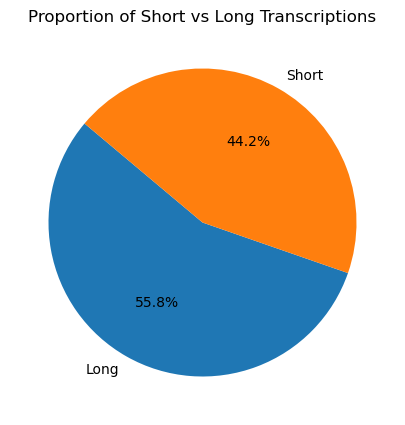

In [10]:
short_long_counts = text_df['transcription_length'].apply(lambda x: 'Short' if x <= 50 else 'Long').value_counts()
plt.figure(figsize=(8, 5))
plt.pie(short_long_counts, labels=short_long_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Short vs Long Transcriptions')
plt.show()


In [4]:
# Display basic information about the DataFrame
print(text_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76294 entries, 0 to 76293
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   utterance_id          76294 non-null  object
 1   transcription         76294 non-null  object
 2   transcription_length  76294 non-null  int64 
 3   word_count            76294 non-null  int64 
 4   unique_word_count     76294 non-null  int64 
 5   punctuation_count     76294 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.5+ MB
None


In [15]:
# Count unique utterance IDs
unique_utterances = text_df['utterance_id'].nunique()
print(f'Unique utterance IDs: {unique_utterances}')

# Check the number of non-empty transcriptions
non_empty_transcriptions = text_df['transcription'].notna().sum()
print(f'Non-empty transcriptions: {non_empty_transcriptions}')

# Calculate the length of each transcription
text_df['transcription_length'] = text_df['transcription'].str.len()

# Descriptive statistics of transcription lengths
length_stats = text_df['transcription_length'].describe()
print(length_stats)

Unique utterance IDs: 76294
Non-empty transcriptions: 76294
count    76294.000000
mean        75.712913
std         61.719570
min          1.000000
25%         19.000000
50%         63.000000
75%        122.000000
max        325.000000
Name: transcription_length, dtype: float64


count    76294.000000
mean        16.375075
std         13.177760
min          1.000000
25%          4.000000
50%         14.000000
75%         26.000000
max         72.000000
Name: word_count, dtype: float64


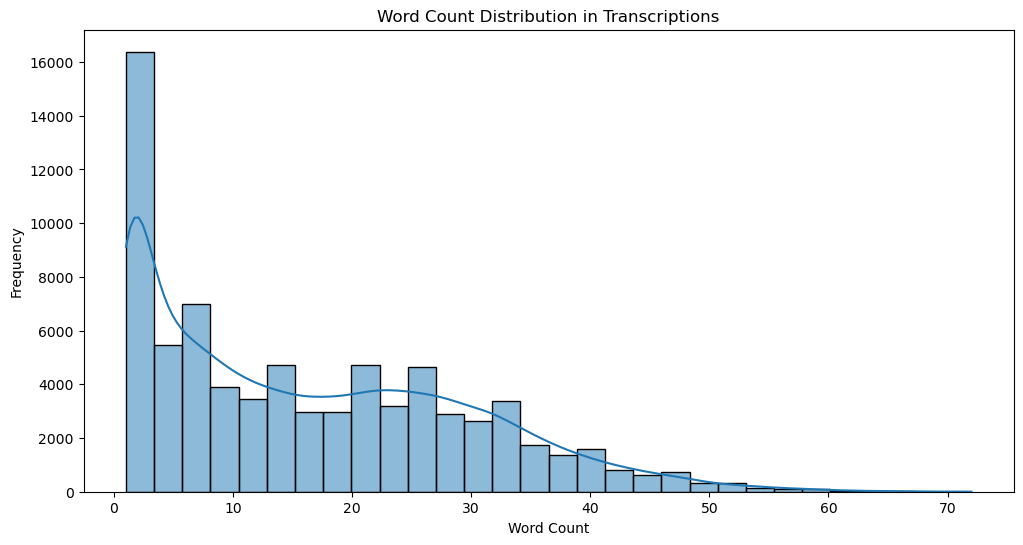

In [6]:
# Calculate word count for each transcription
text_df['word_count'] = text_df['transcription'].str.split().apply(len)

# Descriptive statistics for word counts
word_count_stats = text_df['word_count'].describe()
print(word_count_stats)

# Visualize word count distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(text_df['word_count'], bins=30, kde=True)
plt.title('Word Count Distribution in Transcriptions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [18]:
from collections import Counter

# Combine all transcriptions into a single list of words
all_words = text_df['transcription'].str.cat(sep=' ').split()

# Count occurrences of each word
word_counts = Counter(all_words)

# Get the most common words
most_common_words = word_counts.most_common(20)
print("Most Common Words:")
for word, count in most_common_words:
    print(f'{word}: {count}')


Most Common Words:
ਤੇ: 23210
ਹੈ: 22299
ਵੀ: 22270
ਦੇ: 19427
ਨੂੰ: 15767
ਉਹ: 14632
ਦਾ: 13838
ਦੀ: 13805
ਨੇ: 13055
ਵਿੱਚ: 12448
ਆ: 12158
ਤਾਂ: 11716
ਸੀ: 11564
ਹਾਂ: 10014
ਕਿ: 9637
ਹੀ: 9417
ਇਹ: 9025
ਮੈਂ: 8980
ਨਾ: 8769
ਨਾਲ: 8178


In [21]:
# Check for missing values
missing_values = text_df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
utterance_id            0
transcription           0
transcription_length    0
word_count              0
unique_word_count       0
punctuation_count       0
dtype: int64


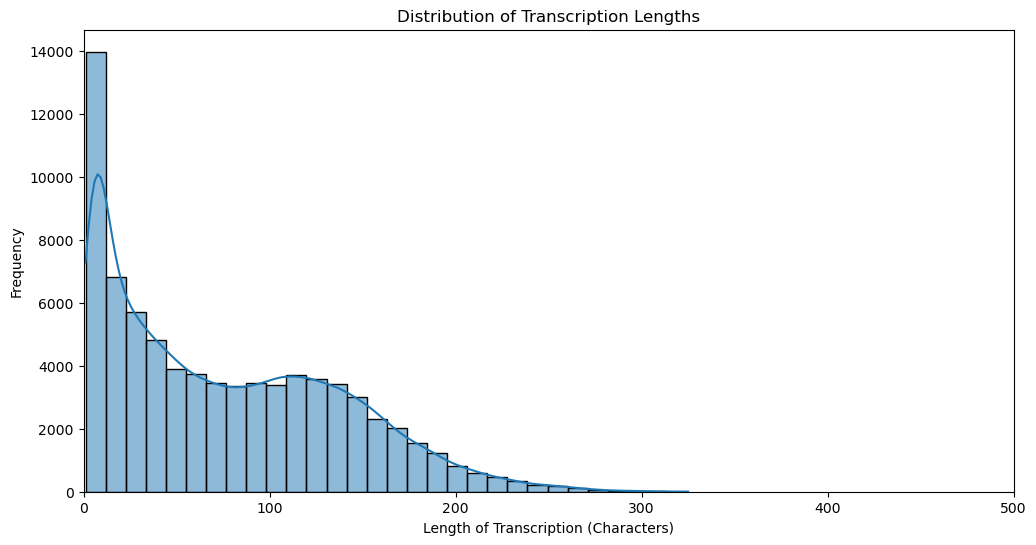

In [23]:
# Visualize the distribution of transcription lengths
plt.figure(figsize=(12, 6))
sns.histplot(text_df['transcription_length'], bins=30, kde=True)
plt.title('Distribution of Transcription Lengths')
plt.xlabel('Length of Transcription (Characters)')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Adjust x-limits based on expected transcription lengths
plt.show()


In [25]:
# Get the top 10 longest transcriptions
longest_transcriptions = text_df.nlargest(10, 'transcription_length')
print("Top 10 Longest Transcriptions:")
print(longest_transcriptions[['utterance_id', 'transcription', 'transcription_length']])


Top 10 Longest Transcriptions:
            utterance_id                                      transcription  \
63505  SHA1P_utt00034322  ਮਤਲਬ ਕਿ company ਨੂੰ ਕੋਈ ਵੀ ਏਦਾਂ ਦੀ tension ਨੀ ...   
68009  SHA1P_utt00039707  ਇਉਂ ਬਸ ਇਹੀ ਬੋਲਿਆ ਮੈਨੂੰ ਪਿਲਾਵਾਂ ਤੈਨੂੰ ਮੈਂ ਕਿਹਾ ...   
61060  SHA1P_utt00031497  ਲੱਗਿਆ ਹਜ਼ਾਰ ਰੁਪਇਆ ਮੈਂ ਕਹਿੰਦੀ ਹਾਂ ਉੱਥੇ ਤੇਰੇ ਜ਼ਿ...   
69436  SHA1P_utt00041428  ਚੱਲ ਅੱਜ ਕੱਲ੍ਹ ਤਾਂ ਪ੍ਰਸਾਸ਼ਨ ਬਹੁਤ ਵਧੀਆ ਹੈ ਰੋਟੀ ਪ...   
54439  SHA1P_utt00023540  Diploma ਕੀਤਾ degree ਕੀਤੀ but ਕੰਮ ਨੀ ਮੈਨੂੰ ਮਿਲ ...   
51222  SHA1P_utt00019567  ਤਿੰਨ ਸੌ ਅਠਾਹਠ number article ਆਪਣੀ amendment ਦਾ...   
64352  SHA1P_utt00035309  ਹਾਂ ਮੈਂ ਤੈਨੂੰ ਇਹੀ ਗੱਲ ਕਹਿ ਰਹੀ ਹਾਂ ਨਾ ਕਿ ਜੇ ਆਪਾ...   
41565  SHA1P_utt00008122  ਔਰ ਫਿਲਮ 'ਚ ਵੀ ਆਹ ਗੱਲ ਕਹਿੰਦੇ ਹੈ, ਕਿਹਨੂੰ ਕਹਿੰਦੇ ...   
64369  SHA1P_utt00035328  ਬਿਲਕੁਲ ਬਿਲਕੁਲ ਇਹ pollution ਕਰਕੇ ਹੀ ਹੁਣ ਜਿੱਦਾਂ ...   
61276  SHA1P_utt00031744  ਨਹੀਂ ਮੇਰੇ phone 'ਚ ਕਦੇ ਇਹ ਜਿਹਾ ਮੈਨੂੰ ਨੀ ਆਇਆ ਮਤ...   

       transcription_length  
63505                   325  
68009                   325  
61060    

In [27]:
# Calculate the number of unique words in the entire dataset
unique_words = set(all_words)
print(f'Total Unique Words: {len(unique_words)}')

# Calculate the unique word count per transcription
text_df['unique_word_count'] = text_df['transcription'].apply(lambda x: len(set(x.split())))
print(text_df[['utterance_id', 'unique_word_count']].head(20))


Total Unique Words: 55173
          utterance_id  unique_word_count
0   KaInDe_utt00000001                  1
1   KaInDe_utt00000002                  1
2   KaInDe_utt00000004                  4
3   KaInDe_utt00000006                  4
4   KaInDe_utt00000007                  8
5   KaInDe_utt00000009                  5
6   KaInDe_utt00000010                 26
7   KaInDe_utt00000011                  9
8   KaInDe_utt00000012                  2
9   KaInDe_utt00000014                 13
10  KaInDe_utt00000015                 17
11  KaInDe_utt00000017                 20
12  KaInDe_utt00000018                 14
13  KaInDe_utt00000019                  9
14  KaInDe_utt00000021                 19
15  KaInDe_utt00000022                  5
16  KaInDe_utt00000024                 19
17  KaInDe_utt00000026                  9
18  KaInDe_utt00000029                 10
19  KaInDe_utt00000030                  5


Punctuation Count Statistics:
count    76294.000000
mean         0.480903
std          1.081452
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         17.000000
Name: punctuation_count, dtype: float64


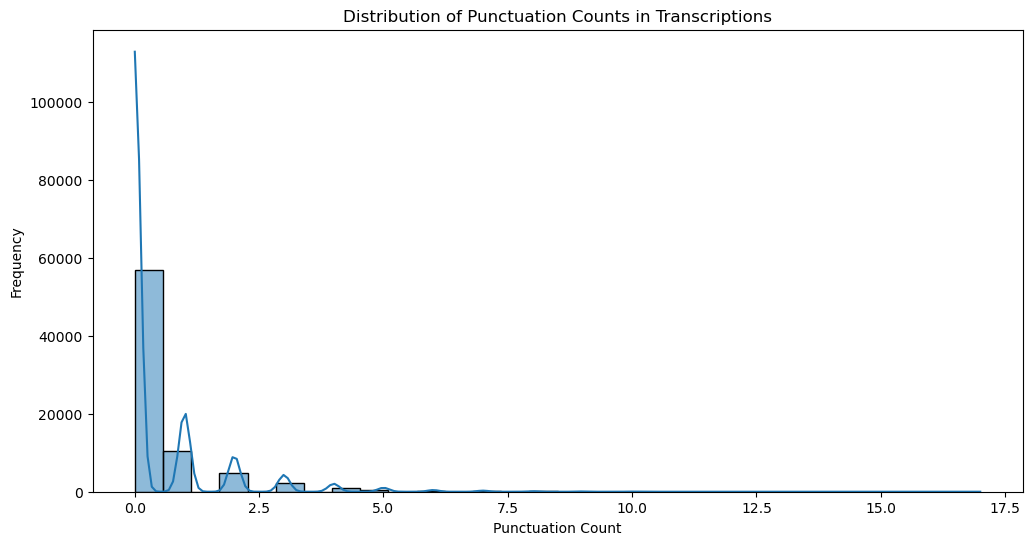

In [29]:
import string

# Count punctuation in transcriptions
text_df['punctuation_count'] = text_df['transcription'].apply(lambda x: sum(1 for char in x if char in string.punctuation))
punctuation_stats = text_df['punctuation_count'].describe()
print("Punctuation Count Statistics:")
print(punctuation_stats)

# Visualize punctuation count distribution
plt.figure(figsize=(12, 6))
sns.histplot(text_df['punctuation_count'], bins=30, kde=True)
plt.title('Distribution of Punctuation Counts in Transcriptions')
plt.xlabel('Punctuation Count')
plt.ylabel('Frequency')
plt.show()


In [71]:
import os

# Define file paths (replace 'path/to' with your actual paths)
text_file = r'D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/text'
utt2dur_file = r'D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/utt2dur'
spk2utt_file = r'D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/spk2utt'
utt2spk_file = r'D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/utt2spk'
wav_file = r'D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/wav'

# Helper function to read file line by line and process it
def read_file_lines(file_path, delimiter=' ', process=lambda x: x):
    data = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f.readlines():
            line_parts = line.strip().split(delimiter)
            data[line_parts[0]] = process(line_parts[1:])
    return data

# 1. Load the text data (utterance_id, transcription)
try:
    text_data = read_file_lines(text_file, delimiter=' ', process=lambda x: ' '.join(x))
    print(f"Loaded {len(text_data)} transcription records.")
except Exception as e:
    print(f"Error loading text data: {e}")

# 2. Load the utt2dur data (utterance duration)
try:
    utt2dur_data = read_file_lines(utt2dur_file, delimiter=' ', process=lambda x: float(x[0]))
    print(f"Loaded {len(utt2dur_data)} utterance durations.")
except Exception as e:
    print(f"Error loading utt2dur data: {e}")

# 3. Load the spk2utt data (mapping from speaker to utterances)
try:
    spk2utt_data = read_file_lines(spk2utt_file, delimiter=' ', process=lambda x: x)
    print(f"Loaded {len(spk2utt_data)} speaker-to-utterance mappings.")
except Exception as e:
    print(f"Error loading spk2utt data: {e}")

# 4. Load utt2spk data (mapping from utterance to speaker)
try:
    utt2spk_data = read_file_lines(utt2spk_file, delimiter=' ', process=lambda x: x[0])
    print(f"Loaded {len(utt2spk_data)} utterance-to-speaker mappings.")
except Exception as e:
    print(f"Error loading utt2spk data: {e}")

# 5. Load wav file paths (list of wav file paths)
try:
    with open(wav_file, 'r', encoding='utf-8') as f:
        wav_paths = [line.strip() for line in f.readlines()]
    print(f"Loaded {len(wav_paths)} wav file paths.")
except Exception as e:
    print(f"Error loading wav file paths: {e}")

# Now let's inspect a few examples from each dataset to ensure everything is correctly loaded
print("\nSample text data (utterance_id -> transcription):")
for i, (utt_id, transcription) in enumerate(text_data.items()):
    if i >= 5: break  # print first 5
    print(f"{utt_id}: {transcription}")

print("\nSample utt2dur data (utterance_id -> duration):")
for i, (utt_id, duration) in enumerate(utt2dur_data.items()):
    if i >= 5: break  # print first 5
    print(f"{utt_id}: {duration} seconds")

print("\nSample spk2utt data (speaker_id -> utterances):")
for i, (spk_id, utterances) in enumerate(spk2utt_data.items()):
    if i >= 5: break  # print first 5
    print(f"{spk_id}: {utterances}")

print("\nSample utt2spk data (utterance_id -> speaker_id):")
for i, (utt_id, spk_id) in enumerate(utt2spk_data.items()):
    if i >= 5: break  # print first 5
    print(f"{utt_id}: {spk_id}")

print("\nSample wav paths:")
for i, wav_path in enumerate(wav_file):
    if i >= 5: break  # print first 5
    print(wav_path)

Loaded 76294 transcription records.
Loaded 76294 utterance durations.
Loaded 76294 speaker-to-utterance mappings.
Loaded 76294 utterance-to-speaker mappings.
Error loading wav file paths: [Errno 2] No such file or directory: 'D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/wav'

Sample text data (utterance_id -> transcription):
KaInDe_utt00000001	hello: 
KaInDe_utt00000002	hello: 
KaInDe_utt00000004	ਸਤਿ: ਸ਼੍ਰੀ ਅਕਾਲ ਮਾਸੀ
KaInDe_utt00000006	ਬਸ: ਵਧੀਆ ਤੁਸੀਂ ਦੱਸੋ
KaInDe_utt00000007	ਮੈਂ: ਵਧੀਆ ਘਰ ਸਭ ਠੀਕ ਮੰਮੀ ਪਾਪਾ ਦਾਦੀ

Sample utt2dur data (utterance_id -> duration):
KaInDe_utt00000001: 0.654 seconds
KaInDe_utt00000002: 0.889 seconds
KaInDe_utt00000004: 1.716 seconds
KaInDe_utt00000006: 2.338 seconds
KaInDe_utt00000007: 3.931 seconds

Sample spk2utt data (speaker_id -> utterances):
KaInDe_utt00000001: ['KaInDe_utt00000001']
KaInDe_utt00000002: ['KaInDe_utt00000002']
KaInDe_utt00000004: ['KaInDe_utt00000004']
KaInDe_utt00000006: ['KaInDe_utt00000006']
KaInDe_utt00000007: ['KaInDe_utt0000000

In [81]:
import numpy as np

# Basic statistics on utterance durations
durations = list(utt2dur_data.values())
print(f"Number of utterances: {len(durations)}")
print(f"Total duration: {sum(durations):.2f} seconds")
print(f"Average duration: {np.mean(durations):.2f} seconds")
print(f"Max duration: {np.max(durations):.2f} seconds")
print(f"Min duration: {np.min(durations):.2f} seconds")

Number of utterances: 76294
Total duration: 500259.07 seconds
Average duration: 6.56 seconds
Max duration: 29.97 seconds
Min duration: 0.05 seconds


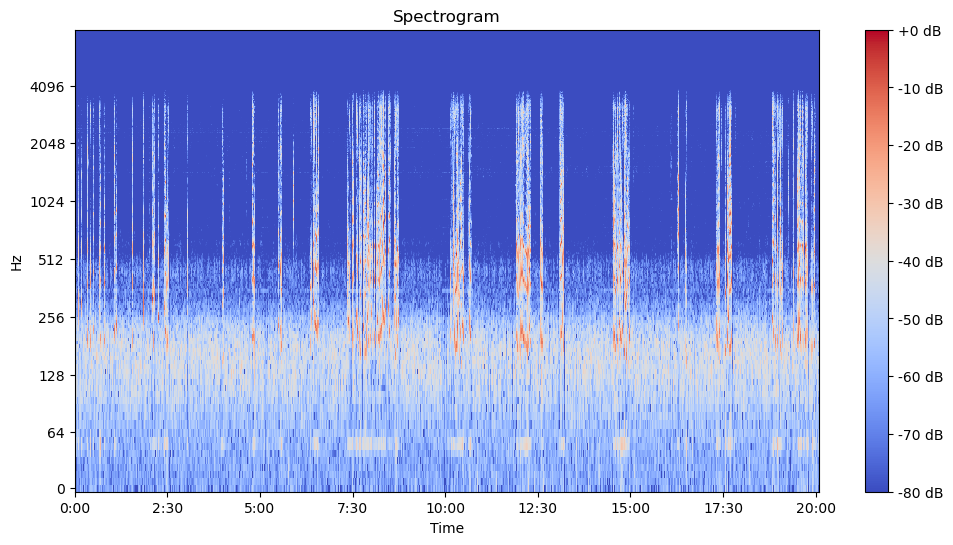

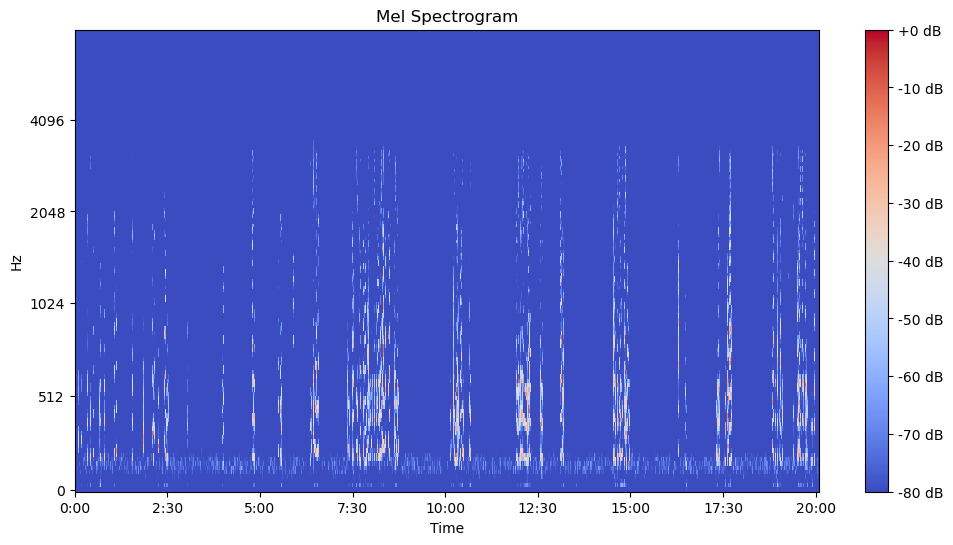

In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to load audio and compute spectrogram
def plot_spectrogram(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Compute the Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(abs(D), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# Function to compute and plot mel spectrogram
def plot_mel_spectrogram(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Compute the mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)

    # Plot the mel spectrogram
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.show()

# Example usage with a WAV file path from your dataset
wav_file_path = "D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/Audio/pa_IN_9828873_20230123_Left.wav"  
plot_spectrogram(wav_file_path)
plot_mel_spectrogram(wav_file_path)


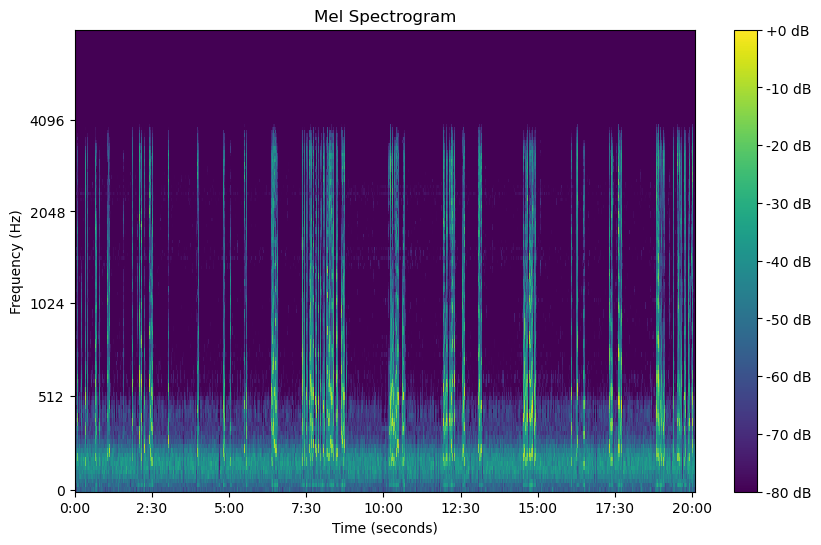

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Specify the path to your audio file
audio_file_path = "D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/Audio/pa_IN_9828873_20230123_Left.wav"

# Load the audio file
y, sr = librosa.load(audio_file_path, sr=None)

# Generate the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert to log scale (dB) for better visualization
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()


# Convert English words into Punjabi 

In [14]:
import pandas as pd
from googletrans import Translator
import time
import re

# Load your existing DataFrame
# Assuming you already have the DataFrame loaded as `text_df`
# Example: text_df = pd.read_csv('path_to_your_dataset.csv')

# Initialize the translator
translator = Translator()

# Function to translate transcriptions for multiple rows
def translate_multiple_transcriptions(transcriptions):
    translated_transcriptions = []
    
    for transcription in transcriptions:
        # Use regex to find English words
        english_words = re.findall(r'[a-zA-Z]+', transcription)

        # If there are no English words, add the original transcription
        if not english_words:
            translated_transcriptions.append(transcription)
            continue

        # Start with the original transcription
        translated_transcription = transcription
        
        for word in english_words:
            try:
                # Translate the word to Punjabi
                translated = translator.translate(word, src='en', dest='pa')
                # Replace the English word with the Punjabi translation
                translated_transcription = translated_transcription.replace(word, translated.text)
                time.sleep(1)  # Delay to avoid hitting the API too quickly
            except Exception as e:
                print(f"Error translating '{word}': {e}")
        
        translated_transcriptions.append(translated_transcription)

    return translated_transcriptions

# Select the transcriptions for the first 20 rows
first_20_transcriptions = text_df['transcription'].head(20)

# Translate the transcriptions for the first 20 rows
translated_first_20 = translate_multiple_transcriptions(first_20_transcriptions)

# Store the results back in the DataFrame
text_df.loc[:19, 'translated_transcription'] = translated_first_20  # Update first 20 rows

# Display the first 20 rows with the original and translated transcriptions
print(text_df[['utterance_id', 'transcription', 'translated_transcription']].head(20))


          utterance_id                                      transcription  \
0   KaInDe_utt00000001                                              hello   
1   KaInDe_utt00000002                                              hello   
2   KaInDe_utt00000004                                 ਸਤਿ ਸ਼੍ਰੀ ਅਕਾਲ ਮਾਸੀ   
3   KaInDe_utt00000006                                 ਬਸ ਵਧੀਆ ਤੁਸੀਂ ਦੱਸੋ   
4   KaInDe_utt00000007                  ਮੈਂ ਵਧੀਆ ਘਰ ਸਭ ਠੀਕ ਮੰਮੀ ਪਾਪਾ ਦਾਦੀ   
5   KaInDe_utt00000009                           ਜੀ ਸਾਰੇ ਹਾਂਜੀ ਤੁਸੀਂ ਦੱਸੋ   
6   KaInDe_utt00000010  ਮੈਂ ਵਧੀਆ ਸਭ ਵਧੀਆ ਤੇਰੇ ਭੇਣ ਭਰਾ ਵੀ ਵਧੀਆ ਮਸਤੀਆਂ ਕ...   
7   KaInDe_utt00000011        ਪਾ ਦੋ ਬਥੇਰੇ course ਚੱਲਦੇ ਪਏ ਬੱਚਿਆਂ ਨੇ ਅੱਜਕਲ   
8   KaInDe_utt00000012                                       ਕਿਹੜੇ course   
9   KaInDe_utt00000014  ਛੋਟੇ ਛੋਟੇ ਬੱਚੇ ਅਮ institute ਵਿੱਚ ਵੀ ਕਰਦੇ ਪਏ ਨੇ...   
10  KaInDe_utt00000015  ਉਹ ਸਾਡੇ ਸ਼ਹਿਰ ਵਿੱਚ ਤਾਂ english speaking ਦੀ prob...   
11  KaInDe_utt00000017  ਹਾਂਜੀ ਫ਼ੇਰ ਇਹ computer ਦੇ related ਕਰ ਦੋ ਕੋਈ com...   

In [3]:
import pandas as pd
import re
import time
from googletrans import Translator

# Initialize the Google Translator
translator = Translator()

# Define a custom dictionary for specific terms
custom_dictionary = {
    'computer': 'ਕੰਪਿਊਟਰ',
    'institute': 'ਸੰਸਥਾ',
    'course': 'ਕੋਰਸ',
    'English': 'ਅੰਗਰੇਜ਼ੀ',
    'coding': 'ਕੋਡਿੰਗ',
    'prob': 'ਸਮੱਸਿਆ',
    'related': 'ਸਬੰਧਤ',
    'energy': 'ਐਨਰਜੀ',
    # Add more terms as needed
}

# Load your data
def custom_parser(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split('\t', 1)  # Split by the first tab only
            if len(parts) == 2:
                utterance_id, transcription = parts
                data.append([utterance_id, transcription])
            else:
                data.append([parts[0], ""])
    return pd.DataFrame(data, columns=['utterance_id', 'transcription'])

# Use the custom parser to load the data
text_df = custom_parser('D:/SPRING_INX_Punjabi_R1/SPRING_INX_Punjabi_R1/train/text')

# Function to translate transcriptions
def translate_multiple_transcriptions(transcriptions):
    translated_transcriptions = []
    
    for transcription in transcriptions:
        # Use regex to find English words
        english_words = re.findall(r'[a-zA-Z]+', transcription)

        # Start with the original transcription
        translated_transcription = transcription

        # Translate using the custom dictionary first
        for word in english_words:
            if word in custom_dictionary:
                translated_transcription = translated_transcription.replace(word, custom_dictionary[word])
            else:
                try:
                    # Translate the word to Punjabi
                    translated = translator.translate(word, src='en', dest='pa')
                    # Replace the English word with the Punjabi translation
                    translated_transcription = translated_transcription.replace(word, translated.text)
                    time.sleep(1)  # Delay to avoid hitting the API too quickly
                except Exception as e:
                    print(f"Error translating '{word}': {e}")
        
        translated_transcriptions.append(translated_transcription)

    return translated_transcriptions

# Select the first 20 rows for translation
rows_to_translate = text_df['transcription'].head(20).tolist()

# Translate the transcriptions
translated_results = translate_multiple_transcriptions(rows_to_translate)

# Add the translations back to the DataFrame
text_df['translated_transcription'] = ''
text_df.loc[:19, 'translated_transcription'] = translated_results  # Update only the first 20 rows

# Check the updated DataFrame
print(text_df.head(20))  # Display the first 20 rows with translations

# Optional: Save to CSV if needed
# text_df.to_csv('path_to_save_translated_dataset.csv', index=False)


          utterance_id                                      transcription  \
0   KaInDe_utt00000001                                              hello   
1   KaInDe_utt00000002                                              hello   
2   KaInDe_utt00000004                                 ਸਤਿ ਸ਼੍ਰੀ ਅਕਾਲ ਮਾਸੀ   
3   KaInDe_utt00000006                                 ਬਸ ਵਧੀਆ ਤੁਸੀਂ ਦੱਸੋ   
4   KaInDe_utt00000007                  ਮੈਂ ਵਧੀਆ ਘਰ ਸਭ ਠੀਕ ਮੰਮੀ ਪਾਪਾ ਦਾਦੀ   
5   KaInDe_utt00000009                           ਜੀ ਸਾਰੇ ਹਾਂਜੀ ਤੁਸੀਂ ਦੱਸੋ   
6   KaInDe_utt00000010  ਮੈਂ ਵਧੀਆ ਸਭ ਵਧੀਆ ਤੇਰੇ ਭੇਣ ਭਰਾ ਵੀ ਵਧੀਆ ਮਸਤੀਆਂ ਕ...   
7   KaInDe_utt00000011        ਪਾ ਦੋ ਬਥੇਰੇ course ਚੱਲਦੇ ਪਏ ਬੱਚਿਆਂ ਨੇ ਅੱਜਕਲ   
8   KaInDe_utt00000012                                       ਕਿਹੜੇ course   
9   KaInDe_utt00000014  ਛੋਟੇ ਛੋਟੇ ਬੱਚੇ ਅਮ institute ਵਿੱਚ ਵੀ ਕਰਦੇ ਪਏ ਨੇ...   
10  KaInDe_utt00000015  ਉਹ ਸਾਡੇ ਸ਼ਹਿਰ ਵਿੱਚ ਤਾਂ english speaking ਦੀ prob...   
11  KaInDe_utt00000017  ਹਾਂਜੀ ਫ਼ੇਰ ਇਹ computer ਦੇ related ਕਰ ਦੋ ਕੋਈ com...   